In [25]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import astropy.units as u 
from astropy.coordinates import SkyCoord
import regions
from regions import Regions

from spectral_cube import SpectralCube
import importlib as imp

import reproject

from dust_extinction.averages import CT06_MWLoc, I05_MWAvg, CT06_MWGC, G21_MWAvg, RL85_MWGC, RRP89_MWGC, F11_MWGC

In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import moment_maker as mm
from jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
import cutout_manager as cm
import jwst_plots
import co_ice as co_map
#imp.reload(jwst_plots)
import extinction as ex
#imp.reload(co_map)

In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [7]:
pos = SkyCoord('17:46:20.6290029866', '-28:37:49.5114204513', unit=(u.hour, u.deg))
l = 113.8*u.arcsec
w = 3.3*u.arcmin
reg = regions.RectangleSkyRegion(pos, width=l, height=w)

# CO gas

In [5]:
fn_12CO = '/orange/adamginsburg/cmz/nobeyama/12CO-2.BEARS.FITS'
fn_13CO = '/orange/adamginsburg/cmz/nobeyama/13CO-2.FOREST.FITS'
fn_C18O = '/orange/adamginsburg/cmz/nobeyama/C18O-2.FOREST.FITS'

In [6]:
cube_12CO = SpectralCube.read(fn_12CO, format='fits')
cube_13CO = SpectralCube.read(fn_13CO, format='fits')
cube_C18O = SpectralCube.read(fn_C18O, format='fits')

In [9]:
subcube_12CO = cube_12CO.subcube_from_regions([reg])
subcube_12CO = subcube_12CO.with_spectral_unit(u.km/u.s).spectral_slab(-57*u.km/u.s, -53*u.km/u.s)#(-56*u.km/u.s, -54*u.km/u.s)#

subcube_13CO = cube_13CO.subcube_from_regions([reg])
subcube_13CO = subcube_13CO.with_spectral_unit(u.km/u.s).spectral_slab(-57*u.km/u.s, -53*u.km/u.s)#(-56*u.km/u.s, -54*u.km/u.s)#

subcube_C18O = cube_C18O.subcube_from_regions([reg])
subcube_C18O = subcube_C18O.with_spectral_unit(u.km/u.s).spectral_slab(-57*u.km/u.s, -53*u.km/u.s)#(-56*u.km/u.s, -54*u.km/u.s)#

In [10]:
subcube_12CO_mom0 = subcube_12CO.moment0()
subcube_13CO_mom0 = subcube_13CO.moment0()
subcube_C18O_mom0 = subcube_C18O.moment0()

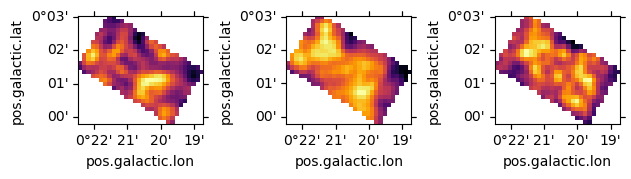

In [ ]:
ax1 = plt.subplot(131, projection=subcube_12CO_mom0.wcs)
ax1.imshow(subcube_12CO_mom0.value, origin='lower', cmap='inferno')

ax2 = plt.subplot(132, projection=subcube_13CO_mom0.wcs)
ax2.imshow(subcube_13CO_mom0.value, origin='lower', cmap='inferno')

ax3 = plt.subplot(133, projection=subcube_C18O_mom0.wcs)
ax3.imshow(subcube_C18O_mom0.value, origin='lower', cmap='inferno')

plt.tight_layout()

# CO ice

In [11]:
co_column_map = co_map.make_co_column_map()

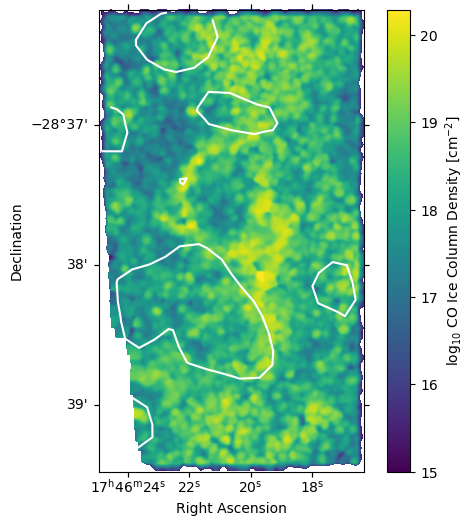

In [23]:
fig = plt.figure(figsize=(6, 6))
co_column_map[co_column_map <= 1e15] = np.nan
ww = ex.get_wcs()
ax = plt.subplot(111, projection=ww)
im = ax.imshow(np.log10(co_column_map), origin='lower')
ax.contour(subcube_12CO_mom0.value, levels=[np.nanpercentile(subcube_12CO_mom0.value, 80)], colors='white', transform=ax.get_transform(subcube_12CO_mom0.wcs))
cb = plt.colorbar(im, label='log$_{10}$ CO Ice Column Density [cm$^{-2}$]')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')


In [24]:
hdu_ice = fits.PrimaryHDU(co_column_map, header=ww.to_header())

In [26]:
arr, foot = reproject.reproject_interp(hdu_ice, subcube_12CO_mom0.wcs, subcube_12CO_mom0.shape, order='nearest-neighbor')

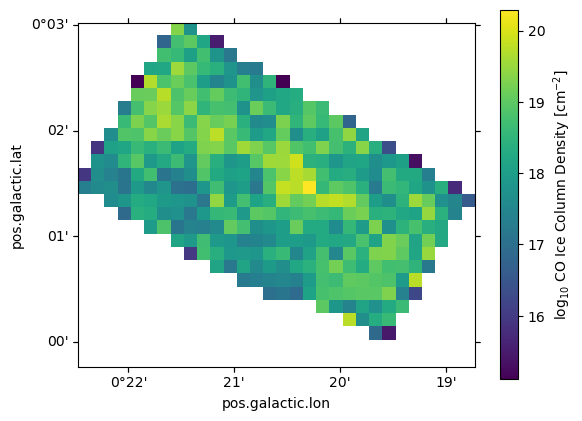

In [29]:
ax = plt.subplot(111, projection=subcube_12CO_mom0.wcs)
im = ax.imshow(np.log10(arr), origin='lower')
cb = plt.colorbar(im, label='log$_{10}$ CO Ice Column Density [cm$^{-2}$]')

Text(0, 0.5, '$^{12}$CO Integrated Intensity [K km/s]')

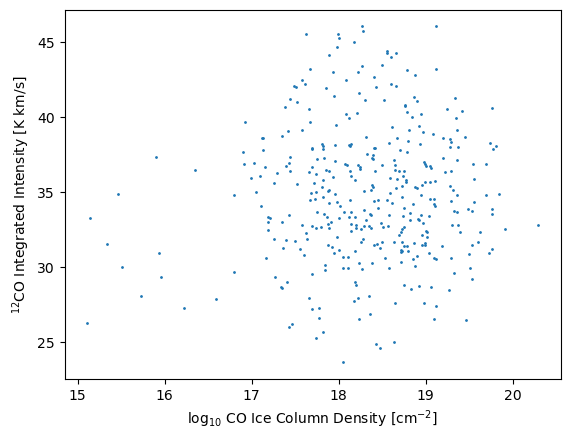

In [32]:
ice_flat = arr.flatten()
co_flat = subcube_12CO_mom0.value.flatten()
mask = np.isfinite(ice_flat) & np.isfinite(co_flat)
ice_flat = ice_flat[mask]
co_flat = co_flat[mask]

plt.scatter(np.log10(ice_flat), co_flat, s=1)
plt.xlabel('log$_{10}$ CO Ice Column Density [cm$^{-2}$]')
plt.ylabel('$^{12}$CO Integrated Intensity [K km/s]')

In [33]:
arr, foot = reproject.reproject_interp(hdu_ice, subcube_13CO_mom0.wcs, subcube_13CO_mom0.shape, order='nearest-neighbor')

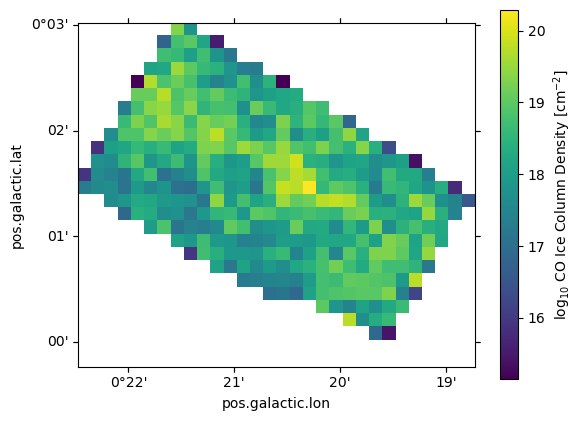

In [34]:
ax = plt.subplot(111, projection=subcube_13CO_mom0.wcs)
im = ax.imshow(np.log10(arr), origin='lower')
cb = plt.colorbar(im, label='log$_{10}$ CO Ice Column Density [cm$^{-2}$]')

Text(0, 0.5, '$^{13}$CO Integrated Intensity [K km/s]')

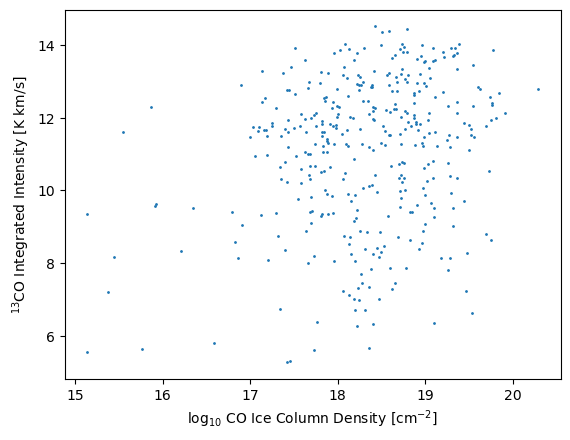

In [35]:
ice_flat = arr.flatten()
co_flat = subcube_13CO_mom0.value.flatten()
mask = np.isfinite(ice_flat) & np.isfinite(co_flat)
ice_flat = ice_flat[mask]
co_flat = co_flat[mask]

plt.scatter(np.log10(ice_flat), co_flat, s=1)
plt.xlabel('log$_{10}$ CO Ice Column Density [cm$^{-2}$]')
plt.ylabel('$^{13}$CO Integrated Intensity [K km/s]')

In [36]:
arr, foot = reproject.reproject_interp(hdu_ice, subcube_C18O_mom0.wcs, subcube_C18O_mom0.shape, order='nearest-neighbor')

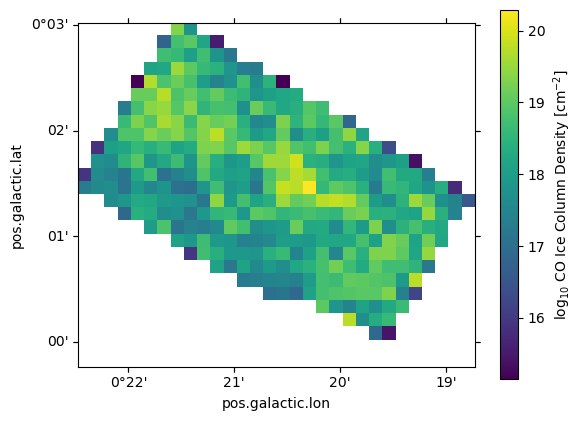

In [37]:
ax = plt.subplot(111, projection=subcube_C18O_mom0.wcs)
im = ax.imshow(np.log10(arr), origin='lower')
cb = plt.colorbar(im, label='log$_{10}$ CO Ice Column Density [cm$^{-2}$]')

Text(0, 0.5, 'C$^{18}$O Integrated Intensity [K km/s]')

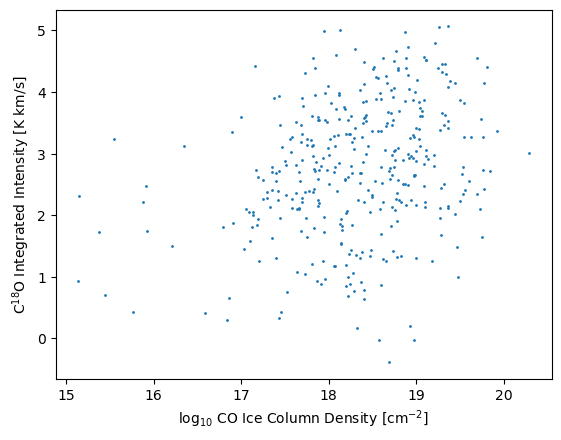

In [38]:
ice_flat = arr.flatten()
co_flat = subcube_C18O_mom0.value.flatten()
mask = np.isfinite(ice_flat) & np.isfinite(co_flat)
ice_flat = ice_flat[mask]
co_flat = co_flat[mask]

plt.scatter(np.log10(ice_flat), co_flat, s=1)
plt.xlabel('log$_{10}$ CO Ice Column Density [cm$^{-2}$]')
plt.ylabel('C$^{18}$O Integrated Intensity [K km/s]')